In [15]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [16]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

In [17]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/kaggle/input/mridataset/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [18]:
paths = []
for r, d, f in os.walk(r"/kaggle/input/mridataset/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [19]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [20]:
result = np.array(result)
result = result.reshape(139,2)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [23]:
y_train.shape

(111, 2)

In [24]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 26.5100 - val_loss: 106.1076
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 24.2691 - val_loss: 14.6561
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 4.2641 - val_loss: 16.0851
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 2.0793 - val_loss: 7.6993
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 1.4886 - val_loss: 2.9878
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 1.6100 - val_loss: 6.7145
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.0566 - val_loss: 9.4773
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.4601 - val_loss: 9.0943
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.1889 - val_loss: 7.2495
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.0970 - val_loss: 5.7440
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.0930 - val_loss: 4.4632
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.3239 - val_loss: 3.6959
Epoch 13/30
3/3 ━━

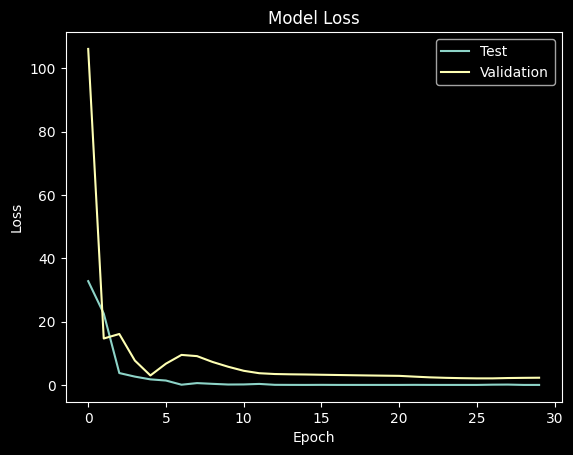

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [26]:
def names(number):
    if number==0:
        return 'It is a Tumor'
    else:
        return 'No, It is not a tumor'

100.0% Confidence This Is No, Its not a tumor


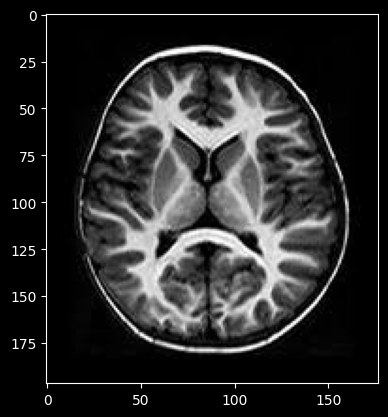

In [27]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/mridataset/brain_tumor_dataset/no/14 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))